# Visualization of training results

This notebook uses the saved training data and shows the results visually for further analysis. I tried to follow the guidelines from [this](http://rll.berkeley.edu/deeprlcourse/docs/plotting_handout.pdf) handout of the cs294 DeepRL course from UCBerkeley, in which it gives various suggestions for storing training data, making visualizations, etc..

Following these suggestions, the method used for making visualizations of the training results is as follows:

* Saving training results into .pkl files (logger.py) for later plotting and storing as much information as possible for later analysis, like losses, average losses (over a fixed-sized window) and bellman errors.
* Loading the results from the saved .pkl files (logger.py) after all training runs have been made (various runs with same hyperparameters, and also with two different seeds)
* Visualizing the results (this notebook) using std plots of the various saved statistics.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import logger
import plotter

%matplotlib inline

## Plot single training runs

This part deals with the visualization of single runs (for testing purposes). There is going to be at least one training
session .pkl file in the repo (and perhaps no more, as each weights ~ 10MB).

* First, let's define some helper functions to visualize single runs:

In [2]:
# folder where all runs are located
BASE_FOLDER = os.path.join( os.getcwd(), 'results' )

# a helper to plot a training series
def plotSeries( series, 
                startStep = 1, 
                color = 'r', 
                title = '', 
                linestyle = '-', 
                fig = None, 
                axes = None, 
                isScore = True ) :
    # iteration indices (recall, smoothed start at step 100)
    _steps = np.arange( len( series ) ) + startStep
    
    if fig is None or axes is None :
        fig, axes = plt.subplots()
    
    axes.grid( True )
    axes.plot( _steps, series, color = color, linestyle = linestyle )
    axes.set_title( title )
    
    # if scores plot, then plot the requirement
    if isScore :
        axes.axhline( 13., linestyle = '--' )
    
    return fig, axes

# a helper to plot the results of a run
def plotSingleRun( sessionId, title = 'Scores during training', showAll = True, fig = None, axes = None, useRandomColor = False ) :
    # path to .pkl file (from sessionId)
    _folder = os.path.join( BASE_FOLDER, sessionId )
    _filepath = os.path.join( _folder, sessionId + '_results.pkl' )
    
    # load all training results
    _data = logger.loadTrainingResults( _filepath )
    
    if fig is None or axes is None :
        fig, axes = plt.subplots()
        
    # plot all results available
    if showAll :
        fig, axes = plotSeries( _data['scoresAll'], 
                                color = 'b' if not useRandomColor else np.random.rand( 3, ), 
                                title = title,
                                fig = fig,
                                axes = axes )
        
    fig, axes = plotSeries( _data['scoresAvg'], 
                            startStep = 100, 
                            color = 'r' if not useRandomColor else np.random.rand( 3, ), 
                            title = title,
                            fig = fig,
                            axes = axes,
                            linestyle = '-')
    
    axes.set_xlabel( 'Episodes' )
    axes.set_ylabel( 'Score' )
    
    return fig, axes

* Plot some of the results of the *submission* training sessions

    * All submissions sessions have the pattern: **banana\_submission\_run\_{run}\_pytorch\_seed\_{seed}**
    * All experiment-1 sessions have the pattern: **banana\_hypertests\_config\_1\_{1|2}\_run\_{run}\_pytorch\_seed\_{seed}**


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ed8cdd860>)

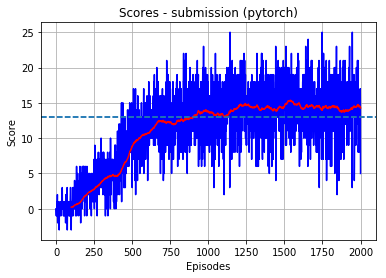

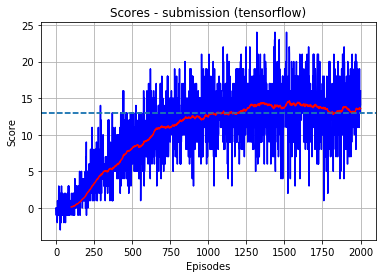

In [12]:
# plotting a single run from the submissions sessions (using pytorch)
plotSingleRun( 'banana_submission_run_0_pytorch_seed_0', title = 'Scores - submission (pytorch)' )

# plotting a single run from the submissions sessions (using tensorflow)
plotSingleRun( 'banana_submission_run_0_tensorflow_seed_0', title = 'Scores - submission (tensorflow)' )

* Plot some of the results of the *experiment-1* training sessions

    * All experiment-1 sessions have the pattern: **banana\_hypertests\_config\_1\_{1|2}\_run\_{run}\_pytorch\_seed\_{seed}**


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ed8e3b4e0>)

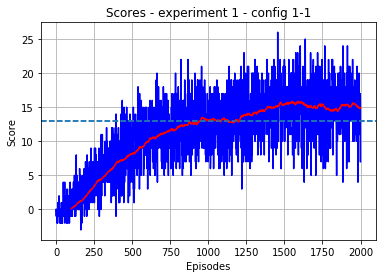

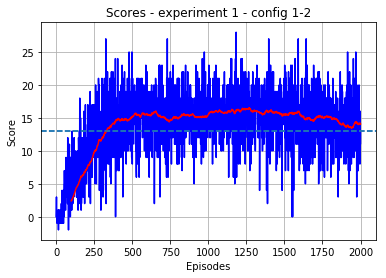

In [13]:
# plotting a single run from the experiment-1 sessions (config_1_1)
plotSingleRun( 'banana_hypertests_config_1_1_run_0_pytorch_seed_0', title = 'Scores - experiment 1 - config 1-1' )

# plotting a single run from the experiment-1 sessions (config_1_2)
plotSingleRun( 'banana_hypertests_config_1_2_run_0_pytorch_seed_0', title = 'Scores - experiment 1 - config 1-2' )

* Plot some of the results of the *experiment-2* training sessions

    * All experiment-1 sessions have the pattern: **banana\_improvements\_config\_2\_{1|2|3}\_run\_{run}\_pytorch\_seed\_{seed}**


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6eda02f7b8>)

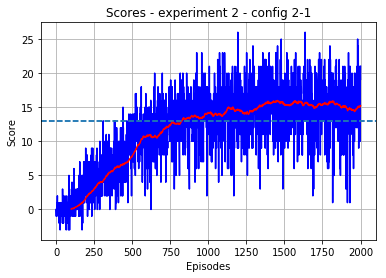

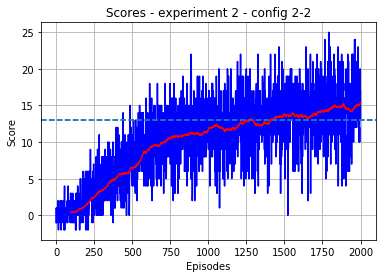

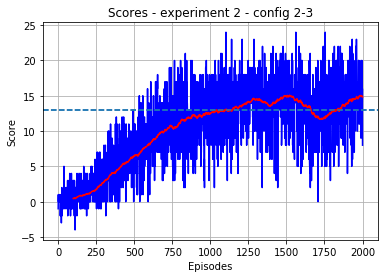

In [25]:
# plotting a single run from the experiment-2 sessions (config_2_1)
plotSingleRun( 'banana_improvements_config_2_1_run_0_pytorch_seed_0', title = 'Scores - experiment 2 - config 2-1' )

# plotting a single run from the experiment-2 sessions (config_2_2)
plotSingleRun( 'banana_improvements_config_2_2_run_0_pytorch_seed_0', title = 'Scores - experiment 2 - config 2-2' )

# plotting a single run from the experiment-3 sessions (config_2_3)
plotSingleRun( 'banana_improvements_config_2_3_run_0_pytorch_seed_0', title = 'Scores - experiment 2 - config 2-3' )

* Plot some of the results of the *experiment-3* training sessions

    * All experiment-1 sessions have the pattern: **banana\_exploration\_config\_3\_{1|2}\_run\_{run}\_pytorch\_seed\_{seed}**


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6ed8bf7908>)

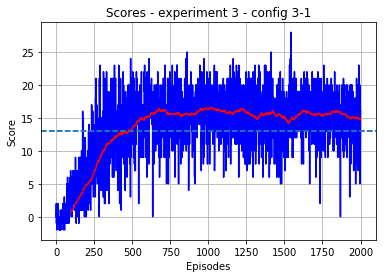

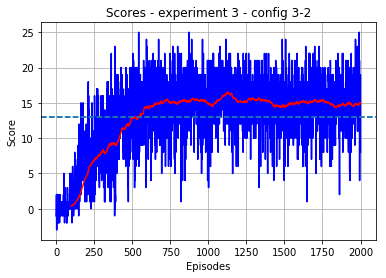

In [26]:
# plotting a single run from the experiment-3 sessions (config_3_1)
plotSingleRun( 'banana_exploration_config_3_1_run_0_pytorch_seed_0', title = 'Scores - experiment 3 - config 3-1' )

# plotting a single run from the experiment-3 sessions (config_3_2)
plotSingleRun( 'banana_exploration_config_3_2_run_0_pytorch_seed_0', title = 'Scores - experiment 3 - config 3-2' )

* Plotting (running averages) all runs into one graph (submission configuration)

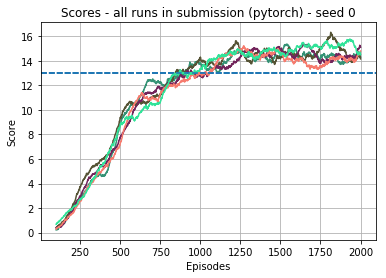

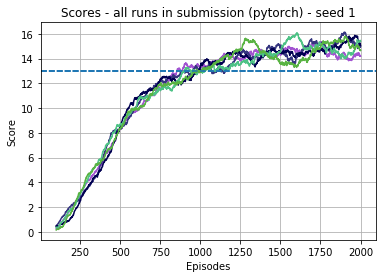

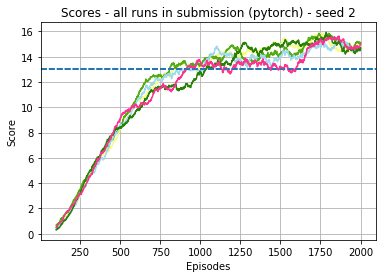

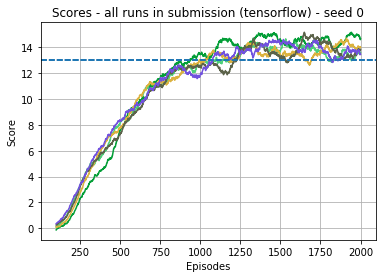

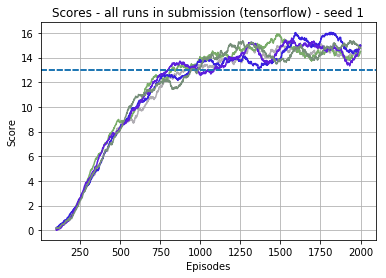

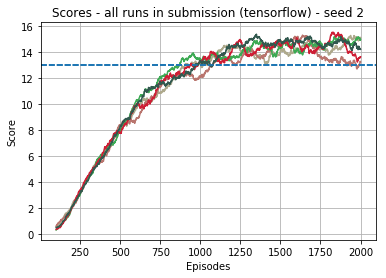

In [4]:
# plotting all runs from the submissions sessions (using pytorch)
for seed in [0,1,2] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_submission_run_' + str(run) + '_pytorch_seed_' + str(seed), 
                                   title = 'Scores - all runs in submission (pytorch) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )

# plotting a single run from the submissions sessions (using tensorflow)
for seed in [0,1,2] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_submission_run_' + str(run) + '_tensorflow_seed_' + str(seed), 
                                   title = 'Scores - all runs in submission (tensorflow) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )

* Plotting (running averages) all runs into one graph (experiment-1 configuration)

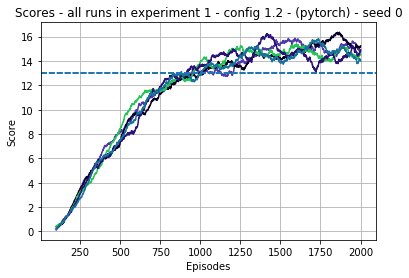

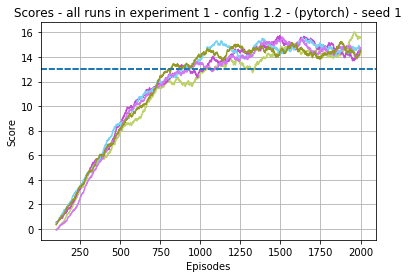

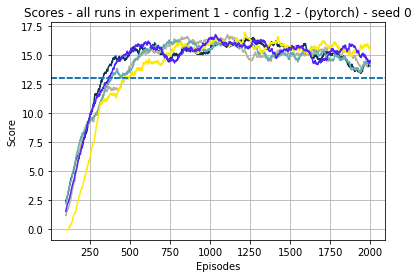

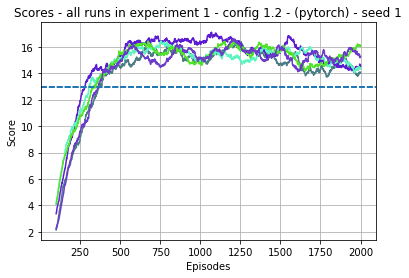

In [18]:
# plotting all runs from the experiment 1 - config 1-1 sessions (using pytorch)
for seed in [0,1] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_hypertests_config_1_1_run_' + str(run) + '_pytorch_seed_' + str(seed), 
                                   title = 'Scores - all runs in experiment 1 - config 1.2 - (pytorch) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )
        
# plotting all runs from the experiment 1 - config 1-2 sessions (using pytorch)
for seed in [0,1] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_hypertests_config_1_2_run_' + str(run) + '_pytorch_seed_' + str(seed), 
                                   title = 'Scores - all runs in experiment 1 - config 1.2 - (pytorch) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )

* Plotting (running averages) all runs into one graph (experiment-2 configuration)

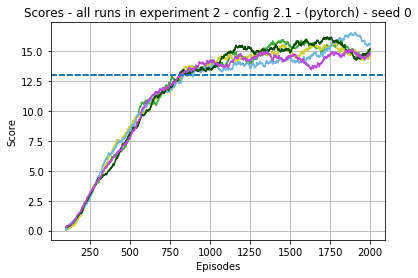

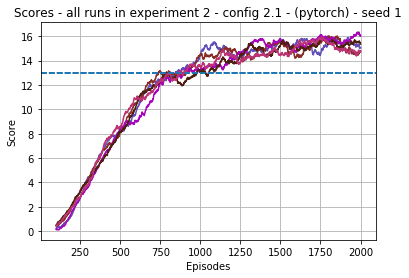

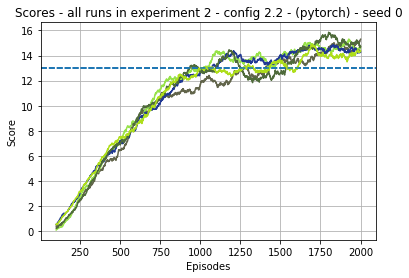

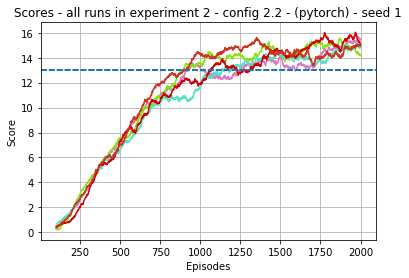

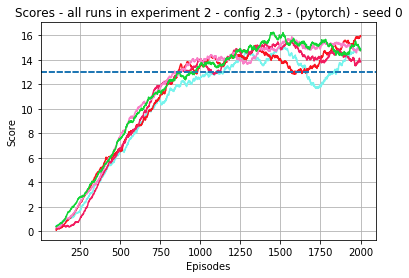

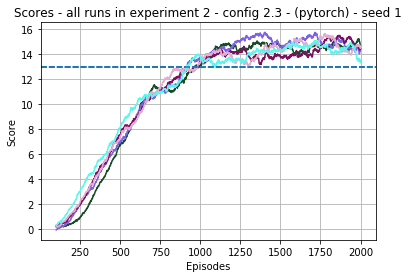

In [23]:
# plotting all runs from the experiment 2 - config 2-1 sessions (using pytorch)
for seed in [0,1] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_improvements_config_2_1_run_' + str(run) + '_pytorch_seed_' + str(seed), 
                                   title = 'Scores - all runs in experiment 2 - config 2.1 - (pytorch) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )
        
# plotting all runs from the experiment 2 - config 2-2 sessions (using pytorch)
for seed in [0,1] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_improvements_config_2_2_run_' + str(run) + '_pytorch_seed_' + str(seed), 
                                   title = 'Scores - all runs in experiment 2 - config 2.2 - (pytorch) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )
        
# plotting all runs from the experiment 2 - config 2-3 sessions (using pytorch)
for seed in [0,1] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_improvements_config_2_3_run_' + str(run) + '_pytorch_seed_' + str(seed), 
                                   title = 'Scores - all runs in experiment 2 - config 2.3 - (pytorch) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )

* Plotting (running averages) all runs into one graph (experiment-1 configuration)

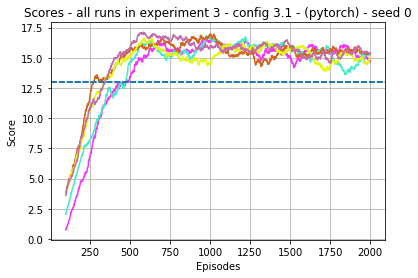

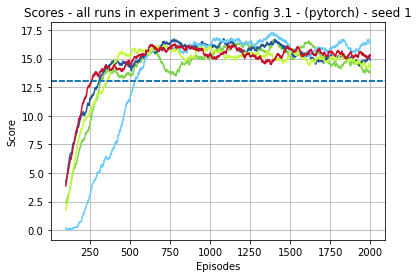

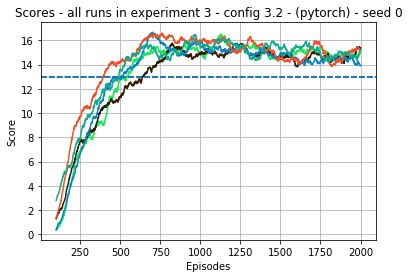

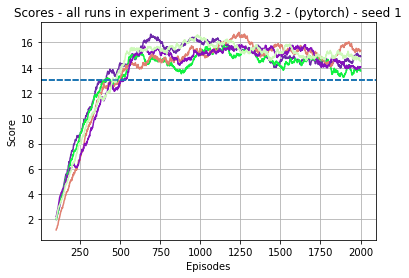

In [27]:
# plotting all runs from the experiment 3 - config 3-1 sessions (using pytorch)
for seed in [0,1] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_exploration_config_3_1_run_' + str(run) + '_pytorch_seed_' + str(seed), 
                                   title = 'Scores - all runs in experiment 3 - config 3.1 - (pytorch) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )
        
# plotting all runs from the experiment 3 - config 3-2 sessions (using pytorch)
for seed in [0,1] :
    fig, axes = None, None
    for run in [0,1,2,3,4] :
        fig, axes = plotSingleRun( 'banana_exploration_config_3_2_run_' + str(run) + '_pytorch_seed_' + str(seed), 
                                   title = 'Scores - all runs in experiment 3 - config 3.2 - (pytorch) - seed %s' % str(seed), 
                                   fig = fig, 
                                   axes = axes, 
                                   showAll = False,
                                   useRandomColor = True )

## Plotting various runs using std-plots

We run multiple training **sessions** with different configurations and group them in **experiments**. The results in this section will consist on std-plots with regions shaded to represent standard deviation over runs over same experiment, and the mean shown as a single strong lineplot in between.

The experiments for which we have various runs consists of the following:

1. Submission   : Different runs with the same configuration, and three different seeds
2. Experiment 1 : Different hyperparameters configuration (exploration)
3. Experiment 2 : Impact of improvements (no-ddqn, ddqn-only, per-only, ddqn+per)
4. Experiment 3 : Testing per+ddqn in two settings of low-exploration v.s. regular-exploration

* First, let's define a helper functions to load all runs for one configuration. Recall that all experiments have a common base name, given as follows:

    * Submission   : banana\_submission\_run\_{0,1,2,3,4}\_pytorch\_seed\_{0,1,2}
    * Experiment-1 : banana\_hypertests\_config\_1\_{1,2}\_run\_{0,1,2,3,4}\_pytorch\_seed\_{0,1}
    * Experiment-2 : banana\_improvements\_config\_2\_{1,2,3}\_run\_{0,1,2,3,4}\_pytorch\_seed\_{0,1}
    * Experiment-3 : banana\_exploration\_config\_3\_{1,2}\_run\_{0,1,2,3,4}\_pytorch\_seed\_{0,1}

In [5]:
# same common loader function, as the experiments have ...
# a common naming-structure along experiments
#
# banana_(EXPERIMENT-NAME)_config_(EXPERIMENT-NUMBER)_(CONFIG-ID)_run_(CONFIG-RUN-ID)_pytorch_seed_(SEED-ID)
#

from itertools import product
from IPython.core.debugger import set_trace

def loadSubmissionResults( runs = [0,1,2,3,4], seeds = [0], library = 'pytorch' ) :
    _sessionsResults = { 'scoresAvg' : [],
                         'scoresAll' : [],
                         'bellmanErrors' : [] }

    for sessRunId, sessSeed in product( runs, seeds ) :
        _sessionName = 'banana_submission_run_' + str( sessRunId ) + '_' + library + '_seed_' + str(sessSeed)
        
        _sessionFolder = os.path.join( BASE_FOLDER,_sessionName )
        
        _resultsFilepath = os.path.join( _sessionFolder, _sessionName + '_results.pkl' )
        
        _resultsData = logger.loadTrainingResults( _resultsFilepath )
        
        _sessionsResults['scoresAvg'].append( _resultsData['scoresAvg'] )
        _sessionsResults['scoresAll'].append( _resultsData['scoresAll'] )
        
    return _sessionsResults
    
def loadExperimentResults( experimentName, experimentNumber, 
                           configIds, configRunIds,
                           seeds ) :
    _sessionsResults = { 'scoresAvg' : [],
                         'scoresAll' : [],
                         'bellmanErrors' : [] }
    
    for sessConfigId, sessRunId, sessSeed in product( configIds, configRunIds, seeds ) :
        _sessionName = 'banana_' + experimentName + '_config_' + str(experimentNumber) + '_' + str(sessConfigId) + \
                       '_run_' + str( sessRunId ) + '_pytorch_seed_' + str(sessSeed)
        
        _sessionFolder = os.path.join( BASE_FOLDER,_sessionName )
        
        _resultsFilepath = os.path.join( _sessionFolder, _sessionName + '_results.pkl' )
        
        _resultsData = logger.loadTrainingResults( _resultsFilepath )
        
        _sessionsResults['scoresAvg'].append( _resultsData['scoresAvg'] )
        _sessionsResults['scoresAll'].append( _resultsData['scoresAll'] )
        
    return _sessionsResults

* Std-plots for the **submission** runs

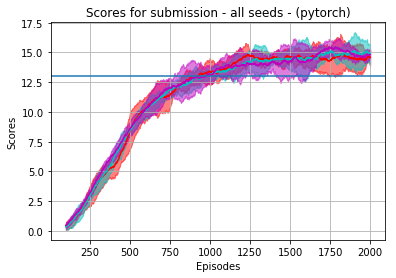

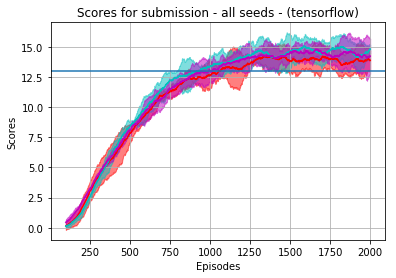

In [11]:
# plotting all runs from the submissions sessions (using pytorch)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1,2] :
    _submissionResultsPerSeed = loadSubmissionResults( runs = [0,1,2,3,4], seeds = [seed], library = 'pytorch' )
    axes = plotter.drawStdPlot( _submissionResultsPerSeed['scoresAvg'], 
                                title = 'Scores for submission - all seeds - (pytorch)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )

# plotting all runs from the submissions sessions (using tensorflow)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1,2] :
    _submissionResultsPerSeed = loadSubmissionResults( runs = [0,1,2,3,4], seeds = [seed], library = 'tensorflow' )
    axes = plotter.drawStdPlot( _submissionResultsPerSeed['scoresAvg'], 
                                title = 'Scores for submission - all seeds - (tensorflow)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )

* Std-plots for the **experiment-1** runs

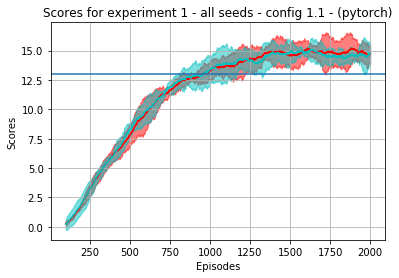

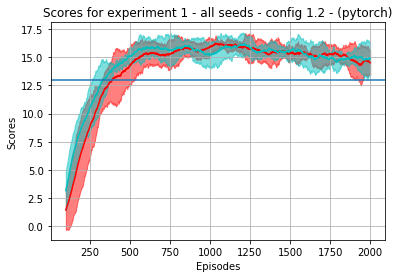

In [19]:
# plotting all runs from the experiment-1 sessions (config 1.1)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1] :
    _experiment1ResultsConfig1 = loadExperimentResults( 'hypertests', 1, [1], [0,1,2,3,4], [seed] )
    axes = plotter.drawStdPlot( _experiment1ResultsConfig1['scoresAvg'], 
                                title = 'Scores for experiment 1 - all seeds - config 1.1 - (pytorch)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )

# plotting all runs from the experiment-1 sessions (config 1.2)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1] :
    _experiment1ResultsConfig2 = loadExperimentResults( 'hypertests', 1, [2], [0,1,2,3,4], [seed] )
    axes = plotter.drawStdPlot( _experiment1ResultsConfig2['scoresAvg'], 
                                title = 'Scores for experiment 1 - all seeds - config 1.2 - (pytorch)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )

* Std-plots for the **experiment-2** runs

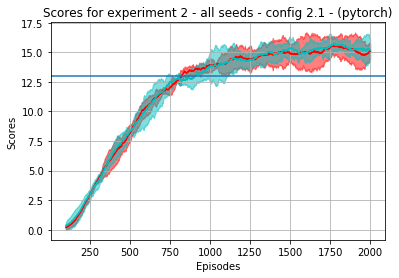

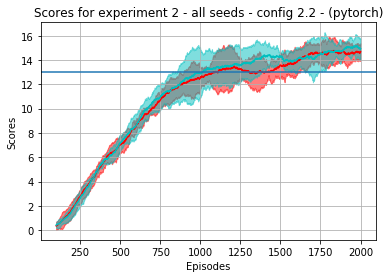

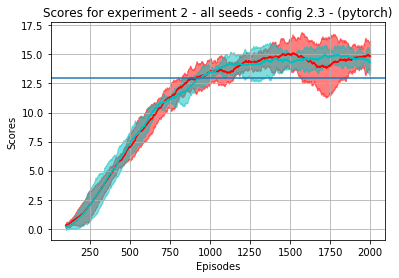

In [28]:
# plotting all runs from the experiment-2 sessions (config 2.1)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1] :
    _experiment2ResultsConfig1 = loadExperimentResults( 'improvements', 2, [1], [0,1,2,3,4], [seed] )
    axes = plotter.drawStdPlot( _experiment2ResultsConfig1['scoresAvg'], 
                                title = 'Scores for experiment 2 - all seeds - config 2.1 - (pytorch)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )

# plotting all runs from the experiment-2 sessions (config 2.2)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1] :
    _experiment2ResultsConfig2 = loadExperimentResults( 'improvements', 2, [2], [0,1,2,3,4], [seed] )
    axes = plotter.drawStdPlot( _experiment2ResultsConfig2['scoresAvg'], 
                                title = 'Scores for experiment 2 - all seeds - config 2.2 - (pytorch)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )

# plotting all runs from the experiment-2 sessions (config 2.3)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1] :
    _experiment2ResultsConfig3 = loadExperimentResults( 'improvements', 2, [3], [0,1,2,3,4], [seed] )
    axes = plotter.drawStdPlot( _experiment2ResultsConfig3['scoresAvg'], 
                                title = 'Scores for experiment 2 - all seeds - config 2.3 - (pytorch)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )

* Std-plots for the **experiment-2** runs

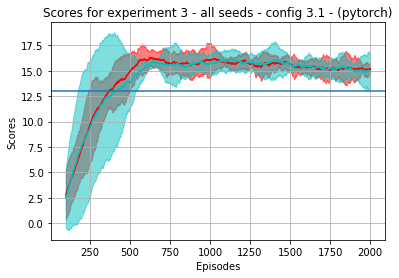

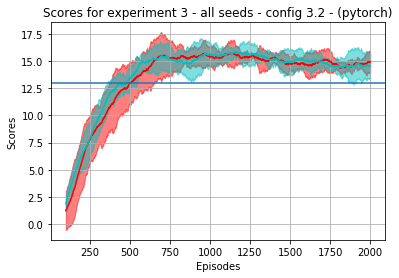

In [29]:
# plotting all runs from the experiment-3 sessions (config 3.1)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1] :
    _experiment3ResultsConfig1 = loadExperimentResults( 'exploration', 3, [1], [0,1,2,3,4], [seed] )
    axes = plotter.drawStdPlot( _experiment3ResultsConfig1['scoresAvg'], 
                                title = 'Scores for experiment 3 - all seeds - config 3.1 - (pytorch)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )

# plotting all runs from the experiment-3 sessions (config 3.2)
fig, axes = None, None
colors = ['r','c','m']
for seed in [0,1] :
    _experiment3ResultsConfig2 = loadExperimentResults( 'exploration', 3, [2], [0,1,2,3,4], [seed] )
    axes = plotter.drawStdPlot( _experiment3ResultsConfig2['scoresAvg'], 
                                title = 'Scores for experiment 3 - all seeds - config 3.2 - (pytorch)',
                                xlabel = 'Episodes',
                                ylabel = 'Scores',
                                startStep = 100,
                                color = colors[seed], 
                                axes = axes )

axes.grid( True )
axes.axhline( 13. )